<a href="https://colab.research.google.com/github/ArkayNeGG/BigDataUPSO/blob/main/TP3/BigDataTP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos el dataset de los crimenes.

In [60]:
import pandas as pd

crimenes=pd.read_csv("/content/Crimenes.csv")

crimenes

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# KMEANS

Creamos una funcion para obtener el valor de clusters ideal para agrupar el dataframe.

In [61]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def bestopt_clusters_kmeans(data, max_k):
    sse = []  # Sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state = 42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, max_k + 1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("KMeans")
    plt.grid(True)
    plt.show()

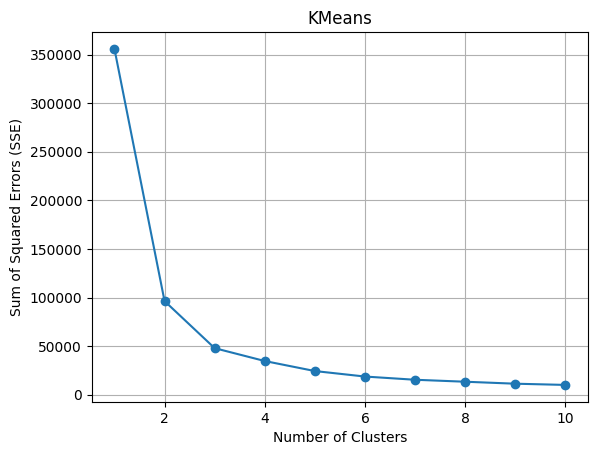

In [62]:
bestopt_clusters_kmeans(crimenes[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']], 10)

Aplicamos el algoritmo K-Means para agrupar los datos en 3 clusters utilizando las características de Asesinatos y Asaltos, y visualizamos estos clusters junto con los centroides en un gráfico de dispersión para explorar la estructura de los datos en función de esas dos variables.

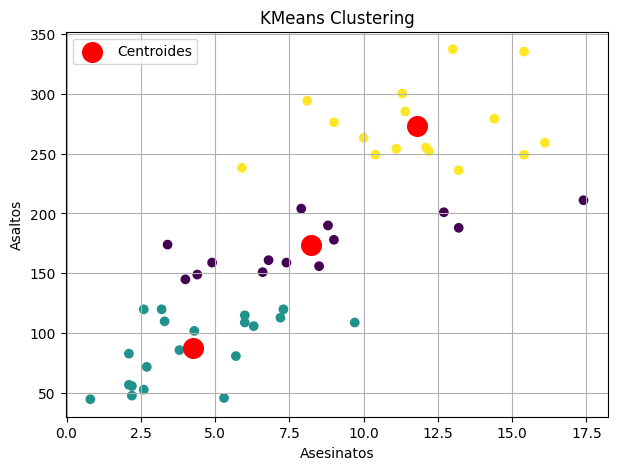

In [63]:
# Creamos el modelo con los clusters obtenidos del grafico (3) y entrenamos
kmeans = KMeans(n_clusters = 3, n_init=10, random_state = 42)
clusters = kmeans.fit_predict(crimenes[['Asesinatos', 'Asaltos', 'Poblacion Urbana', 'Violaciones']])

# Medida del grafico
plt.figure(figsize = (7, 5))

# Graficamos la relacion asesinatos y asaltos, diferenciandolos por su cluster
plt.scatter(crimenes['Asesinatos'], crimenes['Asaltos'], c = clusters, cmap = 'viridis')

# Graficamos los centroides de cada cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', marker = 'o', label = 'Centroides')

# Extras del grafico
plt.xlabel('Asesinatos')
plt.ylabel('Asaltos')
plt.title('KMeans Clustering')
plt.grid(True)
plt.legend()
plt.show()

Extraemos el datasets con los estados y sus codigos y lo guardamos en una variable, para luego agregarlos en una columna "estado_codigo"

In [64]:
c_codes = pd.read_csv('/content/country_codenames.csv')

# Buscamos los estados en nuestro dataframe, extraemos el codigo de el otro dataframe y agregamos a una nueva columna
crimenes['estado_codigo'] = crimenes['Estado'].map(c_codes.set_index('state')['code'])

Columna que no nos interesa, columna que se elimina.

In [65]:
crimenes.drop(columns=['Estado'], inplace=True)
crimenes["Clusters"] = clusters
mapeo_etiquetas = {0: 'Seguro', 1: 'Peligroso', 2: 'Alerta'}
crimenes['Seguridad'] = crimenes['Clusters'].map(mapeo_etiquetas)

Representamos la info obtenida utilizando un gráfico de mapa, y coloreándolos según su peligrosidad.

In [66]:
import plotly.express as px

# Creamos un grafico de mapa
fig = px.choropleth(
    crimenes,    # DataFrame
    locations = 'estado_codigo',   # Columna con codigos de estado
    locationmode = 'USA-states',
    color = 'Seguridad',    # Columna con los clusters (clusters con str para mejor visualizacion)
    scope = 'usa',
    color_discrete_sequence = ["red", "yellow", "green"],   # Secuencia de colores a seguir
)

# Fijamos un titulo y graficamos
fig.update_layout(title_text = 'Mapa de Clusters')
fig.show()